In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

# **Week 6**: Geospatial Data Analysis 

[Tony Cannistra](https://github.com/acannistra) | [UWSEDS](https://uwseds.github.io) Sp20

**The purpose of this notebook** is to work through the following questions:

1. What *is* geospatial data really?
1. What software packages exist to perform analysis on Geospatial data? 
1. How do I create geospatial data visualizations?

These topics will hopefully serve as a foundation for future work and practice with geospatial data analysis, an incredibly rich subfield in data science. 

Note: the code presented in this notebook requires several package dependencies. These dependencies are presented in `geo_basic.yml`, and can be installed as follows:
```
    conda env create --file geo_basic.yml
```

## **Section 1**: Geospatial Data 101

Before we dive into analysis, it's important to understand some important details about "geospatial data". 

### **1.1**: Geospatial data have "locations" 

Simply put: for data to be "geospatial", it must have a concept of "location" associated with it. For example, consider the following "geospatial data": 

In [2]:
nrows = 9
_d = pd.DataFrame(
    {
        'X' : np.linspace(45000, 6600, nrows),
        'Y': np.linspace(160000, 150000, nrows),
        'abundance': np.random.randint(5e2, size=nrows)
    }
)
_d

,X,Y,abundance
0,45000.0,160000.0,24
1,40200.0,158750.0,268
2,35400.0,157500.0,205
3,30600.0,156250.0,465
4,25800.0,155000.0,264
5,21000.0,153750.0,269
6,16200.0,152500.0,496
7,11400.0,151250.0,202
8,6600.0,150000.0,491


Here we have some measure of "`abundance`" paired with "`X`" and "`Y`" values. What's the first question that comes to mind here? Probably: **"What do those coordinates mean?"** Where are **X** and **Y**?

Another way to ask this question: *what **"coordinate system"** or **"projection"** are these points given in?* 

So, what's a "projection"? 

###  **1.2**: Earth is round

You've probably heard of "latitude" and "longitude" as ways to describe places on the Earth. These are measures that rely on the Earth being a sphere (well, actually, an ellipse), as follows: 

* **Latitude** describes the number of *degrees on a sphere* away from the earth's horizontal middle, what we call the **equator**.

* **Longitude** describes the number of *degrees on a sphere* away from the earth's vertical middle, known as a **prime meridian**.



<center>
![](https://cdn.britannica.com/s:700x500/63/2063-004-606AA722/Perspective-globe-grid-parallels-meridians-longitude-latitude.jpg)
</center>



Latitude and Longitude are known as **geographic** or **spherical** coordinates. Because the units are "degrees", special care must be given when computing things like distances using these coordinates, for example (think back to high school geometry class...). 

The "model" of the Earth's shape that's used to define a "spherical coordinate system" is called a *datum*. You may see two primary datums: **WGS84**, which is a "mean" estimate for the whole world, and **NAD83**, which is a datum that increases positional accuracy in North America.]

When you receive data in geographic/spherical coordinates, it's important to know which datum the data were recorded in. (9/10 times it'll be WGS84). 

We also have **projected** coordinates. In fact, we'll *always* need to think about projected coordinates, because "projections" are the key to plotting *spherical data* onto a *flat plane*, like your computer screen or a piece of paper. To hammer this one home, think about this orange: 

<center>
![](https://geohackweek.github.io/visualization/assets/img/orange.png)
</center>

When we attempt to flatten our round planet [orange] to the two-dimensional screen [the table], we're forced to make certain assumptions. For example: perhaps being able to compare area across the globe is critical (i.e. a two-cm square anywhere on our paper map has the same surface area on the globe), or perhaps preserving the ‘real’ shapes of landmasses is important. 

**Each set of assumptions and tradeoffs we create is referred to as a “projection,”** and consists of a set of equations which convert spherical (or, in the case of Earth, ellipsoidal) coordinates into planar coordinates. (The orange above is an example of this--and is actually a real projection known as the [Goode Homolosine](https://en.wikipedia.org/wiki/Goode_homolosine_projection) projection). 

When we "project" spherical coordinates into a "projected coordinate system", we assign it an X/Y coordinate pair in a two-dimensional plane, whose purpose is to map geographic coordiantes to a flat surface, that's defined by the projection.

Some Examples ([comic](https://xkcd.com/977/)):
<table align="center">
    <tr align="center">
        <td><img style="width: 100%" src="https://i.guim.co.uk/img/static/Guardian/global/gallery/2009/apr/17/geography/mercator-5130.jpg?w=1010&q=20&auto=format&usm=12&fit=max&dpr=2&s=7fee64700cc5a92d3ffd1ad6306ad53e"/>
        </td>
        <td><img style="width: 100%" src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Lambert_conformal_conic_projection_SW.jpg/700px-Lambert_conformal_conic_projection_SW.jpg'/></td>
        <td>
            <img style="width: 100%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Winkel_triple_projection_SW.jpg/700px-Winkel_triple_projection_SW.jpg"/>
        </td>   
    </tr>
    <tr align="center" style="height: 20px">
        <td>Mercator (web maps)</td>
        <td>Lambert Conformal Conic (weather maps)</td>
        <td>Winkel-Tripel (National Geographic maps)</td>
    </tr>
</table>


Sometimes, instead of receiving data in a "geographic" format (like latitude/longitude, where your "coordinate reference system" is a datum), you might receive a projected data format (like UTM ("Universal Transverse Mercator"). 

**GOOD NEWS**: There are several packages in Python which take care of most of these details under the hood for you, so you don't have to think hard about it. 

**BOTTOM LINE:** When you get some new data, you'll always want to ask: *"what coordinate reference system/projection are these data given in?"* Missing this step will result in inaccurate spatial calulations and inability to plot the data accurately. 

Alright, let's step back from the nitty-gritty about projections and just remember that we always need to know what *kinds* of coordinates we're dealing with. Next let's talk about the different types of geospatial data. 

### **1.3**: The "Two Types" of Geospatial Data

There are two primary formats that you will encounter when dealing with geospatial data: **vector** and **raster**. 

There's a very easy way to know the difference: 

* **Vector** data are points, lines, shapes, or squiggles.
* **Raster** Data are grids (you can think of them as arrays). 

Some Examples: 

| Description | Data Type | 
| ----------- | --------- | 
| The GPS Track you recorded on your run last night | **Vector** |
| The radar map on your weather app | **Raster** | 
| The locations of all of your friends in the neighborhood | **Vector** | 
| A picture of Seattle on Google Satellite view | **Raster** |

Vector data usually refer to specific objects or areas, where Raster data usually represents a larger, contiguous, and fully-measured spatial extent. 

This distinction is important because the **tools we have** to process easy type of data are different, and are optimized for the type of question you're interested in answering for your data. Each data type is better-suited to a specific set of tasks than the other. 

For example: 

* You want to see if the Puget Sound has more frequent algae blooms. Do you want **vector data** (irregular measurements?) or **raster data** (gridded measurements). **Raster Data.**
* You want to find the busiest road in Seattle. Do you want **vector data** (public travel data) or **raster data** (satellite pictures of roads?). **Vector data**. 

Since these data types represent pretty different kinds of information, they accordingly have quite different file types and come in different formats. Here are some examples of on-disk represntations of each kind of data type that you might encounter: 

**Vector File Types**:
* ESRI Shapefiles (`.shp`)
* GeoJSON files (`.geojson`/`.json`)
* Google "Keyhole Markup Language" (`.kml`)
* GPS eXchange Format (`.gpx`)
* CSV files (`.csv`)

Vector file formats usually contain lists or "collections" of "spatial objects" like points, polygons, or lines (sometimes known as "geometries"), each of which can have "properties" or "attributes" associated with them (like names, descriptions, and other data). Well-formed files will contain useful metadata like the coordinate reference system. 

**Raster File Types**:
* GeoTIFFs (`.tif`)
* ASCII Files (`.asc`)
* JPEG2000 (`.jp2`)

Raster files represent a single "geographic extent" with a uniform "grid cell size", and these files store that information along with their coordinate reference systems and other useful metadata. Some formats can also store multi-dimensional data; for example, if a satellite measures different wavelengths of light over the same spatial extent, each of those sets of measurements could be different "dimension" in the file (these are somtimes known as "bands"). 

In the next section, we'll look at tools in Python that can make these file types easy to work with. 

## **Section 2**: Geospatial Analysis in Python

All of that information above might be pretty confusing without some good examples to focus in on, so let's do that here. 

First, let's look at a few Vector datasets. 

### **2.1**: Vector Tools

Like many data scientists who use Python, you're likely now familiar with [Pandas](https://pandas.pydata.org/). Some clever folks decided that the powerful data manipulation tools in Pandas should be able to be applied to geospatial data. Behold: [GeoPandas](https://geopandas.org/). 

Let's see how `geopandas` works in the wild by examining a dataset of the United States National Parks. 

In [3]:
import geopandas as gpd

In [4]:
## open 
parks = gpd.read_file("nps.geojson")

In [5]:
parks.head()

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,id,observed,geometry
0,2006-03-09,None,POC for this update: richard_menicke@nps.gov ...,None,None,None,GLAC,Glacier,National Park,1604373,None,"POLYGON ((-114.47552 49.00091, -114.46101 49.0..."
1,None,None,Shifted 0.04 miles,None,None,None,CANY,Canyonlands,National Park,1604382,None,"MULTIPOLYGON (((-109.88562 38.48543, -109.8853..."
2,None,None,Shifted 0.06 miles,None,None,None,NOCA,North Cascades,National Park,1604517,None,"MULTIPOLYGON (((-121.37761 48.63574, -121.3789..."
3,2008-01-08,None,Lands,None,None,None,KOVA,Kobuk Valley,National Park,1604524,None,"POLYGON ((-159.50279 67.80979, -159.50141 67.8..."
4,2008-01-08,None,Lands,None,None,None,LACL,Lake Clark,National Park,1604526,None,"MULTIPOLYGON (((-152.85083 60.23804, -152.8521..."


The interesting thing to note here is that this looks just like a Pandas `DataFrame`--that's because *it is!*. 

In [6]:
isinstance(parks, pd.DataFrame)

True

This powerful truth means that you can treat this geospatial data just like any Pandas `DataFrame`. 

In [7]:
parks.columns

Index(['DATE_EDIT', 'GIS_LOC_ID', 'GIS_NOTES', 'GROUP_CODE', 'LANDS_CODE',
       'META_MIDF', 'UNIT_CODE', 'UNIT_NAME', 'UNIT_TYPE', 'id', 'observed',
       'geometry'],
      dtype='object')

In [8]:
parks.sort_values(by='UNIT_NAME').head()

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,id,observed,geometry
28,None,None,Shift 0.03 mi.,None,None,None,ACAD,Acadia,National Park,6160626,None,"MULTIPOLYGON (((-68.22595 44.39584, -68.22766 ..."
46,2006-06-19,None,Lands,None,None,None,ARCH,Arches,National Park,7115839,None,"POLYGON ((-109.56204 38.60475, -109.56264 38.6..."
9,2008-02-27,None,Lands - http://landsnet.nps.gov/tractsnet/docu...,None,None,None,BADL,Badlands,National Park,1604633,None,"MULTIPOLYGON (((-102.27705 43.54490, -102.2770..."
29,None,None,Shift 0.03 mi.,None,None,None,BIBE,Big Bend,National Park,6254449,None,"POLYGON ((-102.84985 29.35623, -102.85101 29.3..."
30,None,None,Good,None,None,None,BISC,Biscayne,National Park,6274721,None,"POLYGON ((-80.34638 25.44840, -80.34631 25.449..."


*et cetera*. However, an important difference is the `geometry` column.

In [9]:
parks.geometry.head()

0    POLYGON ((-114.47552 49.00091, -114.46101 49.0...
1    MULTIPOLYGON (((-109.88562 38.48543, -109.8853...
2    MULTIPOLYGON (((-121.37761 48.63574, -121.3789...
3    POLYGON ((-159.50279 67.80979, -159.50141 67.8...
4    MULTIPOLYGON (((-152.85083 60.23804, -152.8521...
Name: geometry, dtype: geometry

These are "geometries" from another "sister" library known as `shapely`. Shapely is a very powerful library for the manipulation of shapes in Python, and geopandas uses it. 

If we look at one, we get an **un-referenced** view of the *shape* in this Jupyter notebook, e.g: 

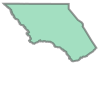

In [10]:
parks.geometry.iloc[0]

In [11]:
## referring to: 
parks.iloc[0]

DATE_EDIT                                            2006-03-09
GIS_LOC_ID                                                 None
GIS_NOTES     POC for this update:  richard_menicke@nps.gov ...
GROUP_CODE                                                 None
LANDS_CODE                                                 None
META_MIDF                                                  None
UNIT_CODE                                                  GLAC
UNIT_NAME                                               Glacier
UNIT_TYPE                                         National Park
id                                                      1604373
observed                                                   None
geometry      POLYGON ((-114.4755159847537 49.0009136904987,...
Name: 0, dtype: object

So we've got some spatial data. **What's the first thing we need to know? What CRS are we in?**

In [12]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

This is telling us that we're in a "`Geographic`" CRS (so lat/lon) with the `WGS84` datum. [Challenge Q: is this unprojected or projected?]

Here's a quick example of the power of Geopandas: 

The spotted owl (*Strix occidentalis*) is a [near-threatened](https://www.iucnredlist.org/species/22689089/119220243) species of owl with declining populations in North America. Let's say we wanted to determine where their natural range might co-occur with protected areas, like National parks? In other words, **Which national parks contain Spotted Owl habitat?**

We've got the national park boundaries above. Let's also grab the boundary of the owl habitat from the IUCN, and limit only to areas where the owl is likely to still exist: 

In [13]:
owl_habitat = gpd.read_file("spotted_owl_iucn.geojson")

In [14]:
owl_habitat.columns

Index(['ASSESSMENT', 'ID_NO', 'BINOMIAL', 'PRESENCE', 'ORIGIN', 'SEASONAL',
       'COMPILER', 'YEAR', 'CITATION', 'LEGEND', 'SUBSPECIES', 'SUBPOP',
       'DIST_COMM', 'ISLAND', 'TAX_COMM', 'geometry'],
      dtype='object')

In [15]:
owl_habitat.LEGEND.unique()

array(['Extant (resident)', 'Possibly Extinct'], dtype=object)

In [16]:
owl_habitat = owl_habitat[owl_habitat.LEGEND.str.contains("Extant")]

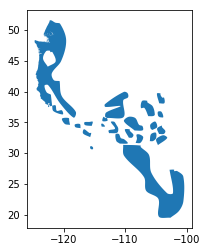

In [17]:
owl_habitat.plot()

We can use the `overlaps` function in `geopandas` to determine whether any national parks overlap this range. **BUT FIRST**, we need to be sure the data are in the same CRS.


In [18]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
owl_habitat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


Looking good. Let's do the analysis. 

In [20]:
owl_habitat_geometry = owl_habitat.geometry.iloc[0]
overlapping_parks = parks[parks.intersects(owl_habitat_geometry)]
overlapping_parks[['UNIT_NAME', 'UNIT_TYPE']]

,UNIT_NAME,UNIT_TYPE
2,North Cascades,National Park
11,Redwood,National Park
17,Yosemite,National Park
18,Great Sand Dunes,National Park
22,Petrified Forest,National Park
24,Lassen Volcanic,National Park
26,Kings Canyon,National Park
27,Sequoia,National Park
31,Capitol Reef,National Park
32,Crater Lake,National Park


Neat!

**For a complete tutorial on Geopandas**, check out these GeoHackWeek Resources: https://geohackweek.github.io/vector/

We'll make a plot of these results later. Let's move on to a quick example of raster data. 

### **2.2**: Raster Tools

Remember earlier when I mentioned that rasters are basically like $N$-dimensional arrays? Well, fortunately we've got a really powerful library in Python to handle nD array computations--Numpy! Similarly to `geopandas`, some developers got together to build a geospatial package on top of Numpy that has the same great nD array performance but knows about the particulars of geospatial rasters. It's called [`rasterio`](https://rasterio.readthedocs.io/en/latest/) (https://rasterio.readthedocs.io/en/latest/). 

For a quick demonstration, let's look at a two-dimensional raster of snow cover in an area near Mount Baker, as measured by a satellite: 

In [21]:
import rasterio as rio

In [22]:
snow = rio.open("20180806_183316_1035_3B_AnalyticMS_SR_snow.tif")

Again: **What's our CRS?**

In [23]:
snow.crs

CRS.from_epsg(4326)

Rasterio returns an "EPSG" code, which you'll see around. It is a shorthand identifier for projections maintained by the European Petroleum Survey Group, and you can look up these identifiers online (https://www.epsg.io).

It just so happens that `EPSG:4326` is the WGS84 geographic "projection".

Again, similar to Numpy, we have access to N-dimensional array abilities: 

In [24]:
snow.shape

(7678, 15872)

However, there are some quirks. For example, `snow.shape` only returns the first two dimensions of the ND array's shape, unlike Numpy. To find out how many "bands" there are in the image, we use "count":

In [25]:
snow.count

1

Here, we only have one. In addition, to get the data, we need to use the`read` method. This allows rasterio to open very huge datasets in pieces, so you can preserve your memory. 

In [26]:
snowdata = snow.read(1)

After using `read` we get a friendly numpy array

In [27]:
isinstance(snowdata, np.ndarray)

True

As such, you can manipulate these data just like a Numpy array. For example, we can compute the percentage of the array that's snow-covered: 


In [28]:
snow_percentage = (snowdata[snowdata == 1].sum(axis=0) / np.dot(*snowdata.shape)) * 100

In [29]:
print(f"Percent Snow: {snow_percentage:.2f}%")

Percent Snow: 6.19%




I won't get into too many details about the other possibilities that Rasterio can handle, but it's a very powerful tool. Here are some examples of what it can do: 
* Re-project raster data
* Turn raster data into vector data (polygons) 
* Change raster file formats
* filter + crop raster data using vector data (polygons) 
* and many more. Check out the documentation and tutorials: https://rasterio.readthedocs.io/en/latest/

There are also great rasterio example tutorials (from UW folks!) here: https://geohackweek.github.io/raster/ 

As a taster, here's an example of a plot with rasterio (Yes, that simple): 

In [30]:
from rasterio import plot

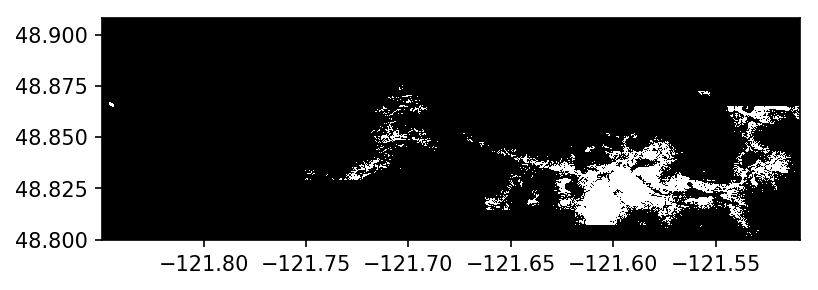

In [31]:
plt.figure(dpi=150)
plot.show(snow, cmap='binary_r')

**For a more complete tutorial on Raster data** check out these GeoHackWeek lessons: https://geohackweek.github.io/raster/

## **Section 3**: Geospatial Visualization in Python

Because it's most common to make visualizations with vector data, we'll stick with using that as our primary example. However, much of the material covered here is equally applicable to visualizations with raster data. 

If you're familiar with making plots in Python, you're likely also familiar with the `matplotlib` package. This very powerful (though somewhat dense) package for plotting is the de-facto standard in Python (though [that](https://altair-viz.github.io/) [is](https://vega.github.io/vega/) [changing](http://holoviews.org/)). 

Similar to the story with `geopandas` and `rasterio`, some smart developers got together and decided to build a geospatially-aware toolkit for matplotlib. 

It's called [`cartopy`](https://scitools.org.uk/cartopy/docs/latest/). Though we will use cartopy primarily for its very convenient features in plotting, it is a general library for managing and switching-between various coordinate reference systems, which is a powerful thing. 

To illustrate the capability of cartopy, let's make a plot where we higlight the national parks that overlap with spotted owl habitat, from above. 

The "core principle" of cartopy-enabled maps is the "projected axes". Cartopy allows you to define matplotlib axes with a given projection assigned to them. Once assigned, these axes will **automatically re-project any data** onto them, so that we can use data with mutliple CRSs in a single plot. 

To illustrate this, I'll use Geopandas' `to_crs` function to re-project our national parks data into the Mercator projection ([EPSG:3857](https://epsg.io/3857)), as follows: 

In [32]:
# import cartopy CRS and Feature modules
import cartopy.crs as ccrs # contains information about coordinate reference systems + how to switch among them
import cartopy.feature as cf # contains helper functions for adding geospatial items to plots

In [33]:
# reproject using Geopandas 
owl_habitat_reprojected = owl_habitat.to_crs(epsg=3857)

Let's make a plot of just the owl habitat to illustrate Cartopy. We'll make a plot in the Lambert Conformal projection, good for the Continentinal US.  

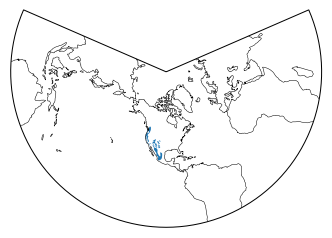

In [34]:
axes = plt.axes(projection=ccrs.LambertConformal())
# Plot owl habitat with add_geometries, which takes a LIST. 
# NOTICE: I specify the CRS of the data here. This is so Cartopy can re-project
# onto the projected-axes. 
axes.add_geometries(owl_habitat_reprojected.geometry, crs=ccrs.epsg(3857))
axes.add_feature(cf.COASTLINE, linewidth=0.5) # add built-in coastline feature from Cartopy

There's our map! You can...sort of see the owl range. However, it isn't that satisfying to look at a map of the whole globe like this. We can use `set_extent` to change this: 

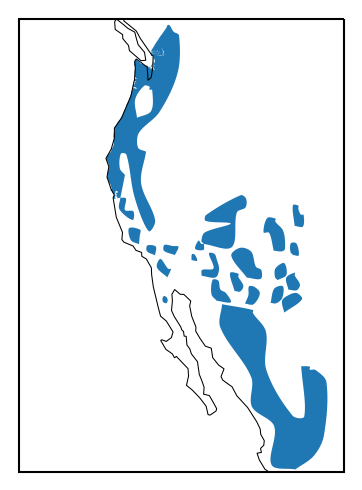

In [212]:

axes = plt.axes(projection=ccrs.LambertConformal())
# Plot owl habitat with add_geometries, which takes a LIST. 
# NOTICE: I specify the CRS of the data here. This is so Cartopy can re-project
# onto the projected-axes. 
axes.add_geometries(owl_habitat_reprojected.geometry, crs=ccrs.epsg(3857))
axes.add_feature(cf.COASTLINE, linewidth=0.5) # add built-in coastline feature from Cartopy

owl_habitat_extent = owl_habitat_reprojected.bounds
axes.set_extent([
    owl_habitat_extent.minx, 
    owl_habitat_extent.maxx,
    owl_habitat_extent.miny, 
    owl_habitat_extent.maxy
], crs=ccrs.epsg(3857))

Neat! Now, let's do some styling to this using Matplotlib comands. 

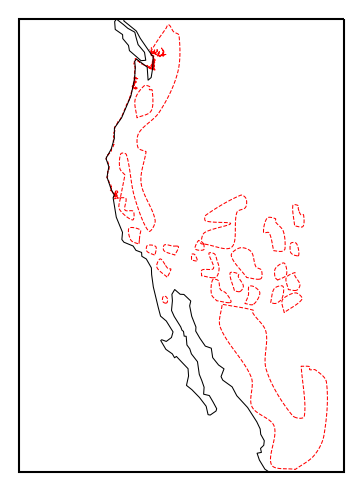

In [213]:

axes = plt.axes(projection=ccrs.LambertConformal())
# Plot owl habitat with add_geometries, which takes a LIST. 
# NOTICE: I specify the CRS of the data here. This is so Cartopy can re-project
# onto the projected-axes. 
axes.add_geometries(owl_habitat_reprojected.geometry, crs=ccrs.epsg(3857),
                    facecolor='none', edgecolor='red', linestyle='--', linewidth=0.5)
axes.add_feature(cf.COASTLINE, linewidth=0.5) # add built-in coastline feature from Cartopy

owl_habitat_extent = owl_habitat_reprojected.bounds
axes.set_extent([
    owl_habitat_extent.minx, 
    owl_habitat_extent.maxx,
    owl_habitat_extent.miny, 
    owl_habitat_extent.maxy
], crs=ccrs.epsg(3857))

Now the polygons of the area are see-through, so we can plot the parks that overlap, like this: 

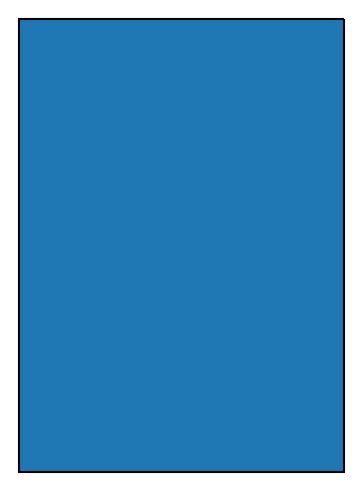

In [226]:

axes = plt.axes(projection=ccrs.LambertConformal())
# Plot owl habitat with add_geometries, which takes a LIST. 
# NOTICE: I specify the CRS of the data here. This is so Cartopy can re-project
# onto the projected-axes. 
axes.add_geometries(owl_habitat_reprojected.geometry, crs=ccrs.epsg(3857),
                    facecolor='none', edgecolor='red', linestyle='--', linewidth=0.5)
axes.add_feature(cf.COASTLINE, linewidth=0.5) # add built-in coastline feature from Cartopy

axes.add_geometries(overlapping_parks.geometry, crs=ccrs.PlateCarree())  ## Unprojected! We need to use the PlateCaree "projection", which simply maps lat/lon coordinates to a rectangular grid. 

owl_habitat_extent = owl_habitat_reprojected.bounds
axes.set_extent([
    owl_habitat_extent.minx, 
    owl_habitat_extent.maxx,
    owl_habitat_extent.miny, 
    owl_habitat_extent.maxy
], crs=ccrs.epsg(3857))

...oops! Looks like that didn't work. This is what it looks like when there's often an "invalid geometry" present in the dataset, e.g. a geometry that doens't follow the "rules". Lucky for us, Geopandas has a quick tip to fix that. We just add a "spatial buffer" of 0 to the data, and it will try to fix invalid geometries:  

In [227]:
overlapping_parks_valid = overlapping_parks.buffer(0)

Let's try again: 

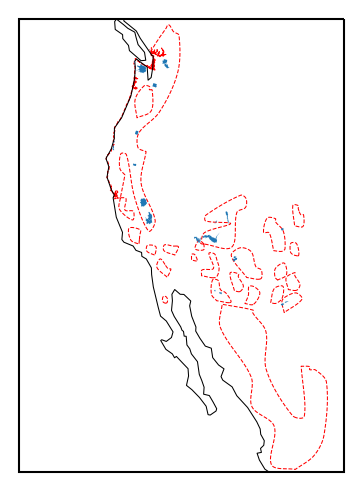

In [229]:

axes = plt.axes(projection=ccrs.LambertConformal())
# Plot owl habitat with add_geometries, which takes a LIST. 
# NOTICE: I specify the CRS of the data here. This is so Cartopy can re-project
# onto the projected-axes. 
axes.add_geometries(owl_habitat_reprojected.geometry, crs=ccrs.epsg(3857),
                    facecolor='none', edgecolor='red', linestyle='--', linewidth=0.5)
axes.add_feature(cf.COASTLINE, linewidth=0.5) # add built-in coastline feature from Cartopy

axes.add_geometries(overlapping_parks_valid.geometry, crs=ccrs.PlateCarree()) ## Unprojected! We need to use the PlateCaree "projection", which simply maps lat/lon coordinates to a rectangular grid. 

owl_habitat_extent = owl_habitat_reprojected.bounds
axes.set_extent([
    owl_habitat_extent.minx, 
    owl_habitat_extent.maxx,
    owl_habitat_extent.miny, 
    owl_habitat_extent.maxy
], crs=ccrs.epsg(3857))

Notice that when we referred to the parks data, we gave a "Geodetic" CRS, because the data are in spherical or geographic coordiates. 

To refine our plot, let's zoom in only to the area of the overlapping parks: 

In [230]:
overlapping_parks.total_bounds

array([-124.73483637,   31.81486603, -104.37075763,   49.00026105])

/Users/tony/miniconda3/envs/geo_basic/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x14d820d58> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


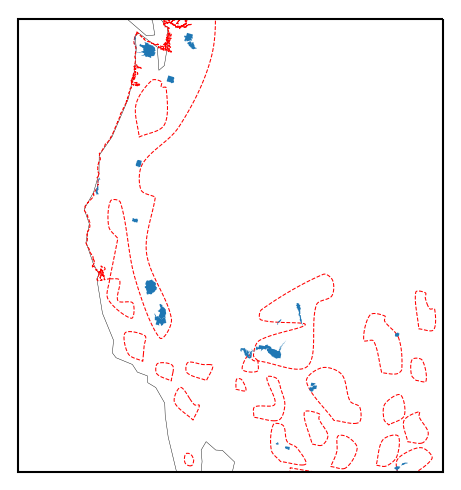

In [231]:

axes = plt.axes(projection=ccrs.LambertConformal())
# Plot owl habitat with add_geometries, which takes a LIST. 
# NOTICE: I specify the CRS of the data here. This is so Cartopy can re-project
# onto the projected-axes.
axes.add_feature(cf.COASTLINE, linewidth=0.2) # add built-in coastline feature from Cartopy

axes.add_geometries(owl_habitat_reprojected.geometry, crs=ccrs.epsg(3857),
                    facecolor='none', edgecolor='red', linestyle='--', linewidth=0.5)

axes.add_geometries(overlapping_parks_valid.geometry, crs=ccrs.Geodetic()) ## Unprojected!

owl_habitat_extent = overlapping_parks.total_bounds
axes.set_extent([
    owl_habitat_extent[0], 
    owl_habitat_extent[2],
    owl_habitat_extent[1], 
    owl_habitat_extent[3]
], crs=ccrs.Geodetic())

Perhaps it would be nice to have State boundaries? Cartopy has a great facility to utilize the free, open-source [Natural Earth](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-1-states-provinces/) dataset which has lots of great open spatial data for use in plotting. Here we'll grab the states dataset and load it using the cartopy `NaturalEarthFeature` function: 

In [232]:
states = cf.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '110m')

/Users/tony/miniconda3/envs/geo_basic/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x14d820af0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


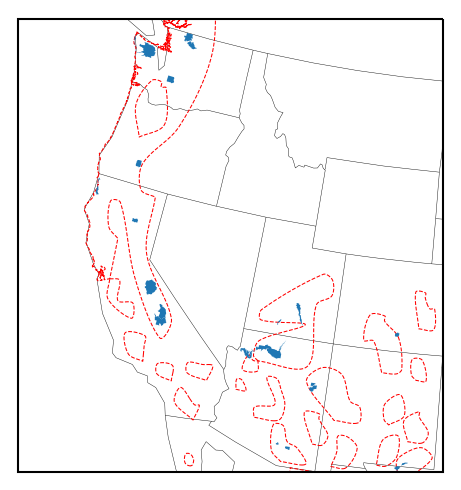

In [233]:

axes = plt.axes(projection=ccrs.LambertConformal())
# Plot owl habitat with add_geometries, which takes a LIST. 
# NOTICE: I specify the CRS of the data here. This is so Cartopy can re-project
# onto the projected-axes.
axes.add_feature(cf.COASTLINE, linewidth=0.2) # add built-in coastline feature from Cartopy
axes.add_feature(states, facecolor='none', edgecolor='k', linewidth=0.2)
axes.add_feature(cf.BORDERS, facecolor='none', edgecolor='k', linewidth=0.2)

axes.add_geometries(owl_habitat_reprojected.geometry, crs=ccrs.epsg(3857),
                    facecolor='none', edgecolor='red', linestyle='--', linewidth=0.5)

axes.add_geometries(overlapping_parks_valid.geometry, crs=ccrs.Geodetic()) ## Unprojected!

owl_habitat_extent = overlapping_parks.total_bounds
axes.set_extent([
    owl_habitat_extent[0], 
    owl_habitat_extent[2],
    owl_habitat_extent[1], 
    owl_habitat_extent[3]
], crs=ccrs.Geodetic())

We can also add the national parks that aren't included, and dim them a bit? 

In [234]:
other_parks = parks[~parks.index.isin(overlapping_parks.index)].buffer(0)

/Users/tony/miniconda3/envs/geo_basic/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x14d820db0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


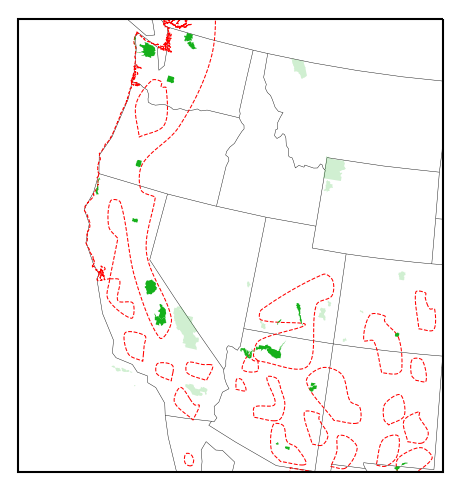

In [235]:

axes = plt.axes(projection=ccrs.LambertConformal())
# Plot owl habitat with add_geometries, which takes a LIST. 
# NOTICE: I specify the CRS of the data here. This is so Cartopy can re-project
# onto the projected-axes.
axes.add_feature(cf.COASTLINE, linewidth=0.2) # add built-in coastline feature from Cartopy
axes.add_feature(states, facecolor='none', edgecolor='k', linewidth=0.2)
axes.add_feature(cf.BORDERS, facecolor='none', edgecolor='k', linewidth=0.2)

axes.add_geometries(owl_habitat_reprojected.geometry, crs=ccrs.epsg(3857),
                    facecolor='none', edgecolor='red', linestyle='--', linewidth=0.5)

axes.add_geometries(overlapping_parks_valid.geometry, crs=ccrs.Geodetic(), ## Unprojected!
                    facecolor='xkcd:green')

axes.add_geometries(other_parks.geometry.buffer(0), crs=ccrs.PlateCarree(), facecolor='xkcd:green', alpha=0.2)

owl_habitat_extent = overlapping_parks.total_bounds
axes.set_extent([
    owl_habitat_extent[0], 
    owl_habitat_extent[2],
    owl_habitat_extent[1], 
    owl_habitat_extent[3]
], crs=ccrs.Geodetic())



**For a more complete Cartopy tutorial** check this out: https://github.com/geohackweek/tutorial_contents/blob/master/visualization/notebooks/cartopyProjections.ipynb

### **3.2**: Interactive Mapping

For the most part, a static map or plot is going to be the best way to communicate your geospatial results. However there will likely be times when you'll want an interactive map, like: 
* you are exploring a new dataset and want to check out the data
* you want to share an interactive map with someone without python ability or GIS capabilities
* you want to show additional data alongside your map

Here we'll briefly introduce the `folium` library, which uses the popular Leaflet javascript library to embed an interactive map within a Juypter notebook. 

To illustrate this, I'll re-build the above map using Folium. 


In [178]:
from folium import Map, GeoJson, GeoJsonTooltip, Figure

In [198]:
# create a simple Leaflet map: 
ff = Figure(height=500)
m = Map(
    location = (40, -99),  # approximate Lat/Lon center of USA
    zoom_start=4,
    tiles='Stamen Toner'
).add_to(ff)

In [199]:
ff

As before, let's start by adding the owl boundary: 

In [200]:
GeoJson(owl_habitat,
        style_function = lambda feature: {
            'fillColor': 'none',
            'color' : 'red',
            'weight' : 2,
            'fillOpacity' : 0,
            'dashArray': 9
        }, name='Owl Habitat'
       ).add_to(m)

In [201]:
ff

You should see the map updated above. Let's now add the parks: 

In [202]:
parks_overlap = GeoJson(
    data=overlapping_parks_valid.simplify(0.01),
    style_function= lambda feature: {
        'color': 'none', 'fillColor': 'green', 'weight':1, 'fillOpacity': 0.9},
    name='Overlapping Parks'
).add_to(m)

In [203]:
ff

And the parks that don't overlap, this time with different opacity:

In [204]:
parks_overlap = GeoJson(
    data=other_parks.simplify(0.01),
    style_function= lambda feature: {
        'color': 'none', 'fillColor': 'green', 'weight':1, 'fillOpacity': 0.2},
    name='Overlapping Parks'
).add_to(m)

In [205]:
ff

You save this map as a self-contained HTML file to share with your friends: 

In [207]:
ff.save("owl_map.html")

In [210]:
!ls *.html

owl_map.html


To learn more about what Folium can do, you can check out this [other tutorial](https://github.com/geohackweek/tutorial_contents/blob/master/visualization/notebooks/foliumTutorial.ipynb)

For completeness, it's worth noting that there are two other libraries available for interactive geospatial visualization in Jupyter notebooks: ipyleaflet (https://ipyleaflet.readthedocs.io/) and GeoViews (https://geoviews.org/). Both have different strengths, so I'd encourage you to check them out.
